# Projet numérique

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
$$ \dot{x_1} = x_1 (\alpha - \beta x_2) $$
$$ \dot{x_2} = -x_2(\gamma - \delta x_1) $$

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement
et $\alpha$, $\beta$, $\gamma$ et $\delta$ sont des paramètres strictement positifs.

1. Donner une interprétation physique à chaque terme de la dynamique.
Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\overline{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Que
peut-on dire de leur stabilité à ce stade ?

**Réponse**

Dans l'expression de $\dot{x_1}$, le coefficient $\alpha > 0$ devant $x_1$ témoigne du fait que plus il y a de proies, plus il y a d'accouplements, et donc de naissances. Quant au terme $-\beta x_1 x_2$, il témoigne du fait que plus il y a de prédateurs, plus le nombre de proies va diminuer, et ce proportionnelement au nombre de proies et de prédateurs.

Dans l'expression de $\dot{x_2}$, le coefficient $-\gamma$ devant $x_2$ vient du fait que plus il y a de prédateurs, plus la concurrence pour l'accès à la nourriture est rude. Ainsi, la survie est plus difficile et le nombre prédateur diminue. Le terme $\delta x_1 x_2$ correspond au fait que plus il y a de proies, mieux les prédateurs survivent, et donc se multiplient.

Notons $f$ la fonction de $\mathbb{R} \times \mathbb{R}$ dans $\mathbb{R} \times \mathbb{R}$, telle que
$$
        f(x_1, x_2) = 
        \begin{pmatrix}
        \alpha x_1 - \beta x_1 x_2 \\
        -\gamma x_2 + \delta x_1 x_2
        \end{pmatrix}
$$

Les points d'équilibres cherchés sont les points $(x_1,x_2)\in\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ tels que $f(x_1, x_2) = 0$. On obtient $(0,0)$ et $\overline{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. Etudions leur stabilité à l'aide de la jacobienne de la fonction $f$ qui caratérise le système.

$$
        J_f(x_1, x_2) = 
        \begin{pmatrix}
        \alpha - \beta x_2 & \delta x_2 \\
        -\beta x_1 & -\gamma + \delta x_1 
        \end{pmatrix}
$$

$J_f (0,0)$ admet $\alpha > 0$ (et $-\gamma$) comme valeurs propres, donc $(0,0)$ est un point d'équilibre instable.

$J_f (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ admet $i \sqrt{\gamma \alpha}$ et $-i \sqrt{\gamma \alpha}$ comme valeurs propres. Comme leur partie réelle est nulle, le critère de Hurwitz est insuffisant pour déterminer la stabilité de ce point d'équilibre.

2. A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le
champ de vecteurs. Intuiter le comportement des solutions. On pourra
aussi utiliser streamplot pour visualiser le portrait de phase.

In [2]:
a = 1 #alpha
b = 0.5 #beta
c = 0.5 #gamma
d = 0.5 #delta
xb = (c/d,a/b) #x barre

In [3]:
def f(x1,x2) :
    return np.array([x1*(a-b*x2),-x2*(c-d*x1)])

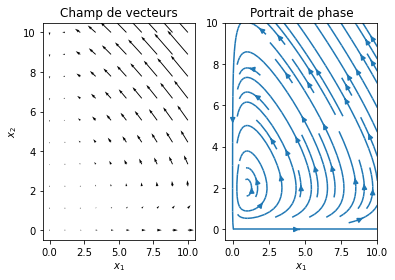

In [4]:
fig = plt.figure()

ax1 = plt.subplot(1,2,1)
ax1.set_title("Champ de vecteurs")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
x = np.linspace(0,10,10)
y = np.linspace(0,10,10)
X, Y = np.meshgrid(x, y)
U, V = f(X,Y)
ax1.quiver(X,Y,U,V)

ax2 = plt.subplot(1,2,2)
ax2.set_title("Portrait de phase")
ax2.set_xlabel('$x_1$')
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)
X, Y = np.meshgrid(x, y)
U, V = f(X,Y)
ax2.streamplot(X, Y, U, V, density=0.6)

plt.show()

3. Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée
dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition

**Réponse**

Raisonnons par l'absurde avec une solution $x$ telle que $x(t_0) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ mais dont une des composantes s'annule en $t_1$. On suppose par exemple que cette composante est $x_1$.

$x_1(t_0) \neq 0$ mais $x_1(t_1) = 0$. Or $f_{x_1} (x) = x_1(\alpha - \beta x_2)$ est de classe $C^1$, donc le théorème de Cauchy-Lipschtz assure que $x_1$ est la seule fonction qui vérifie $\dot{x} = f(x)$ et $x(t_1) = 0$. Or, la fonction nulle vérifie aussi ces critères, donc $x_1 = 0$, ce qui entre en contradiction avec le fait que $x(t_1) \neq 0$.

Le raisonnement serait le même si la composante étudiée était $x_2$.

Donc toute solution initialisée
dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition

4. On considère la fonction
$$ H(x_1, x_2) = \delta x_1 - \gamma \ln{x_1} + \beta x_2 - \alpha \ln{x_2} $$
définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Calculer la dérivée de $H$ le long des solutions
initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. En déduire que toute solution maximale
initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$ et que $\overline{x}$ est stable.

$H'(x_1,x_2) = \dot{x_1}\frac{\delta x_1 - \gamma}{x_1} + \dot{x_2}\frac{\beta x_2 - \alpha}{x_2} = (\alpha - \beta x_2)(\delta x_1 - \gamma) - (\gamma - \delta x_1)(\beta x_2 - \alpha) = 0$

Donc $H$ est constante le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Or, si $x$ tend vers $(0,0)$ ou $\|x\|$ tend vers $+\infty$, alors $H$ tend vers l'infini. Donc une solution $x$ au problème ne peut pas tendre vers un élément de la frontière de  $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ ni avoir une norme qui tend vers $+\infty$. Donc le théorème du domaine maximal d'existence assure que l'ouvert sur lequel la solution maximale $x$ est définie n'est ni majoré ni minoré.

Donc toute solution maximale
initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

**Réponse**

Notons $X = \mathbb{R}_{>0} \times \mathbb{R}_{>0}$
- On obtient, pour $(x_1,x_2)\in X$,
$
\nabla H(x_1,x_2)=
        \begin{pmatrix}
        \delta - \frac{\gamma}{x_1} \\
        \beta - \frac{\alpha}{x_2}
        \end{pmatrix}
$  
Soit $t \mapsto x(t)$ une solution initialisée dans $X$ et définie sur $I$. On a, pour $t \in I$, $H'(x(t)) = \langle \nabla H(x(t)) , f(x(t)) \rangle = 0$ après calculs.


- Soit $x \in X$,
$$\boxed{
H(x) - H(\overline{x}) = \gamma (\frac{\delta x_1}{\gamma} - (1 + ln(\frac{\delta x_1}{\gamma})) + \alpha (\frac{\beta x_2}{\alpha} - (1 + ln(\frac{\beta x_1}{\alpha})) \hspace{1cm} (1)
}$$
En identifiant la fonction $y \longrightarrow y - (1 + ln(y))$, on remarque que :
$$ H(x) \xrightarrow[x \rightarrow \partial X]{} +\infty $$


- Soit $x$ solution maximale de l'équation différentielle, initialisée dans $X$, et définie sur $]a,b[$,
Par l'absurde, si l'on suppose par exemple b fini, on a par théorème  $x(t) \xrightarrow[t \rightarrow b]{} \partial X$.  
D'après le point précédent, on en déduit que $H(x(t)) \xrightarrow[t \rightarrow b]{} +\infty$. Or d'après le premier point, H(x(t)) est constant : c'est impossible. __Donc les solutions maximales sont définies sur $\mathbb{R}$.__


- On considère la fonction potentiel $V(x) := H(x) - H(\overline{x})$.  
On a $V(\overline{x}) = 0$, et, pour $x\in X\setminus\{\overline{x}\}$, $V(x) > 0$ d'après l'expression (1).  
De plus pour toute solution x, $V'(x(t)) = H'(x(t)) \leqslant 0$.  
__Donc, d'après le théorème de Lyapunov, $\overline{x}$ est stable.__

5. Représenter les courbes de niveau de $H$. Qu’en conclue-t-on sur le comportement
des solutions ?

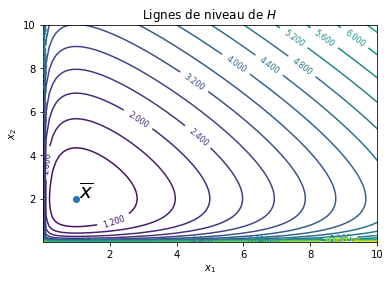

In [5]:
def H(x1,x2) :
    return d*x1 - c*np.log(x1) + b*x2 - a*np.log(x2)

x = np.linspace(0.001,10,100)
y = np.linspace(0.001,10,100)
X, Y = np.meshgrid(x, y)
Z = H(X,Y)
plt.title("Lignes de niveau de $H$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
C = plt.contour(X, Y, Z, 30)
plt.clabel(C, inline=1, fontsize=8)
plt.scatter([c/d],[a/b])
plt.text(c/d+0.1, a/b, "$\overline{x}$", fontsize=20)
plt.show()

On souhaite maintenant simuler numériquement les trajectoires.

6. Coder une fonction du type
```python
def solve_euler_explicit(f, x0, dt, t0, tf):
    ...
    return t, x
```
prenant en entrée une fonction $f : \mathbb{R} \times \mathbb{R}^{n} \longrightarrow \mathbb{R}^{n}$ quelconque, une condition
initiale $x0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

In [6]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    n = int((tf-t0)/dt)
    t = np.linspace(t0, t0+n*dt, n+1)
    x = np.zeros((n+1,)+x0.shape)
    x[0] = x0
    for j in range(n) :
        psi = f(t[j],x[j])
        x[j+1] = x[j] + dt*psi
    return t, x

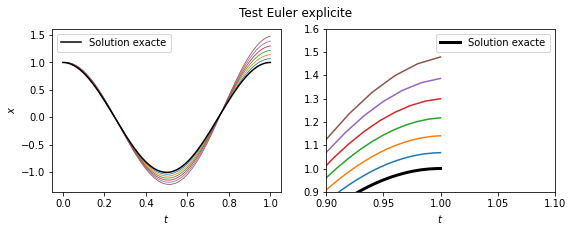

In [7]:
w = 2*np.pi
def f(t,x) :
    return np.array([x[1],-(w**2)*x[0]])

fig = plt.figure(figsize=(9, 3))
plt.suptitle("Test Euler explicite")
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax2.set_xlabel("$t$")


for dt in np.linspace(1/300, 1/50,6) :
    t, x = solve_euler_explicit(f, np.array([1., 0.]), dt, 0, 1.)
    ax1.plot(t, x[:,0], linewidth = 0.8)
    ax2.plot(t, x[:,0])

t = np.linspace(0,1,301)
ax1.plot(t, np.cos(t*2*np.pi), color="black",
         label="Solution exacte")
ax2.plot(t, np.cos(t*2*np.pi), color="black",
         label="Solution exacte", linewidth = 3)
ax1.legend()
ax2.legend()

ax2.set_xlim(0.9, 1.1)
ax2.set_ylim(0.9, 1.6)

plt.show()

7. Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-
Volterra. Que constate-t-on en temps long ? Cette résolution vous semblet-
elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

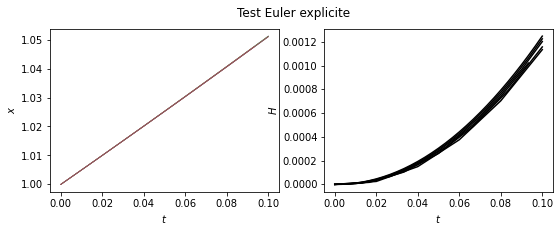

In [8]:
def LV(t,x):
    return np.array([[x[0]*(a - x[1]*b),x[1]*(d*x[0] - c)]])

def H(x):
    return d*x[0] - c*np.log(x[0]) - b*x[1] + a*np.log(x[1])

fig = plt.figure(figsize=(9, 3))
plt.suptitle("Test Euler explicite")
ax1 = plt.subplot(1,2,1)
ax3 = plt.subplot(1,2,2)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax3.set_xlabel("$t$")
ax3.set_ylabel("$H$")


for dt in np.linspace(1/300, 1/50,6) :
    t, x = solve_euler_explicit(LV, np.array([1., 1.]), dt, 0, 0.1)
    ax1.plot(t, x[:,0], linewidth = 0.8)
    ax3.plot(t, np.array([H(x[i,:]) for i in range(len(t))]), color="black",label="H")


plt.show()

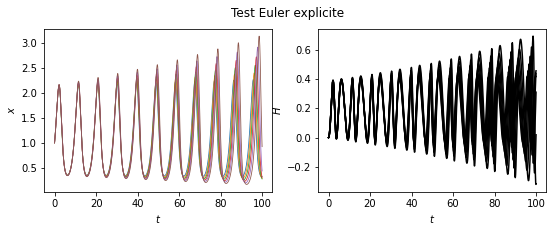

In [9]:
fig = plt.figure(figsize=(9, 3))
plt.suptitle("Test Euler explicite")
ax1 = plt.subplot(1,2,1)
ax3 = plt.subplot(1,2,2)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax2.set_xlabel("$t$")
ax3.set_xlabel("$t$")
ax3.set_ylabel("$H$")


for dt in np.linspace(1/300, 1/50,6) :
    t, x = solve_euler_explicit(LV, np.array([1., 1.]), dt, 0, 100.)
    ax1.plot(t, x[:,0], linewidth = 0.8)
    ax3.plot(t, np.array([H(x[i,:]) for i in range(len(t))]), color="black",label="H")

plt.show()

Au temps longs, l'erreur entre les différentes solutions croît, on peut donc doûter de la convergence du schéma d'Euler explicite.

Toutefois, plusieurs éléments nous poussent à penser que la résolution est tout de même correcte : 
- Si la condition initiale est $(1,2)$, c'est à dire $\overline{x}$, la solution reste constante, même aux temps longs.
- Aux temps courts, H  varie très peu (sa dérivée en t = 0 semble nulle)
- L'oscillation de $x_1$ représentée est bien autour de $1 = \overline{x}_1$

8. Coder maintenant une fonction du type
```python
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
...
return t, x
```
donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

On propose maintenant de modifier ces schémas de façon à stabiliser H et assurer
sa conservation le long des solutions numériques.

8. Expliquer pourquoi les solutions de
$$
\dot{x_1} = x_1(α − βx_2) − u_1(x_1, x_2)(H(x_1, x_2) − H_0)
$$
$$
\dot{x_2} = −x_2(γ − δx_1) − u_2(x_1, x_2)(H(x_1, x_2) − H_0)
$$
sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout
choix de $u : \mathbb{R}^{2} \longrightarrow \mathbb{R}^{2}$
